# 신경망 모델 훈련


In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target)

In [5]:
# 입력층, 은닉층, 출력층을 만드는 함수. 추가적인 층을 만들 수 있게 a_layer를 만듬
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28, 28)))
    model.add(keras.layers.Dense(100, activation = 'relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation = 'softmax'))
    return model

In [7]:
model = model_fn()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
result = model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8964 - loss: 0.2910
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8969 - loss: 0.2888
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9013 - loss: 0.2731
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9084 - loss: 0.2647
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9061 - loss: 0.2612


In [12]:
result.history.keys()

dict_keys(['accuracy', 'loss'])

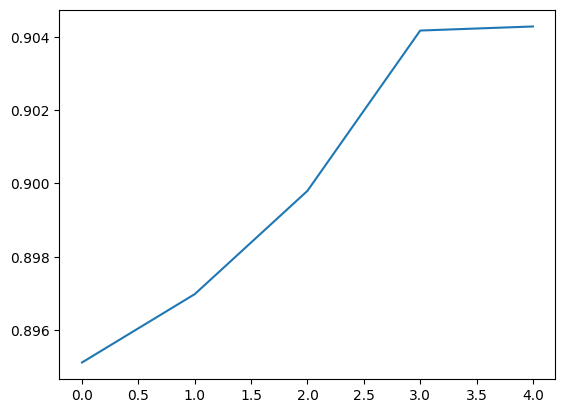

In [16]:
# 정확도
import matplotlib.pyplot as plt

plt.plot(result.history['accuracy'])

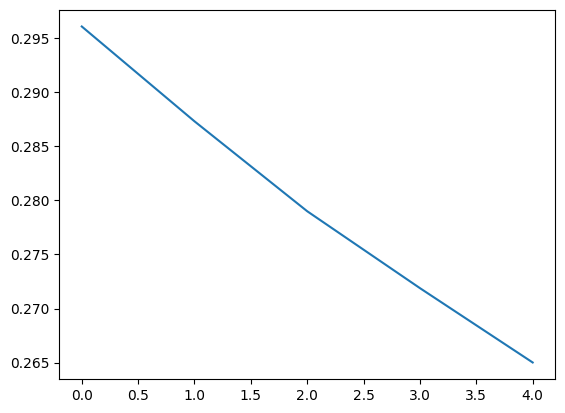

In [15]:
# 손실 값
plt.plot(result.history['loss'])

In [18]:
# 20번 반복해서 5번 반복한 것과 비교
result = model.fit(train_scaled, train_target, epochs = 20)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9105 - loss: 0.2560
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9152 - loss: 0.2448
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9165 - loss: 0.2334
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9166 - loss: 0.2402
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9216 - loss: 0.2292
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9222 - loss: 0.2260
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9219 - loss: 0.2230
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9256 - loss: 0.2173
Epoch 9/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9281 - loss: 0.2131
Epoch 10/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9266 - loss: 0.2117
Epoch 11/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9278 - loss: 0.2055
Epoch 12/20
1407/1407 ━━━━━━━━

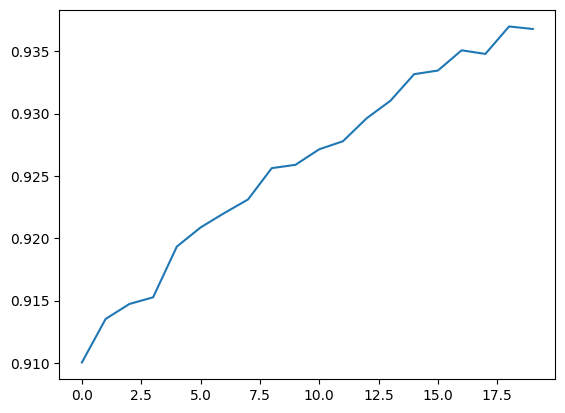

In [19]:
plt.plot(result.history['accuracy'])

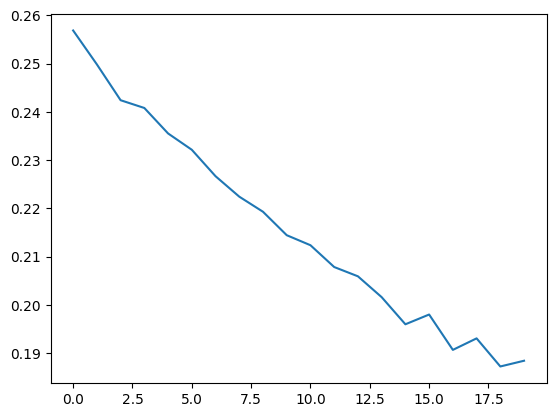

In [20]:
plt.plot(result.history['loss'])

In [22]:
# 정확도가 상승하다 감소하는 부분이 있음, 즉 과대 적합이 일어남
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
result = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target))

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7605 - loss: 0.6869 - val_accuracy: 0.8167 - val_loss: 0.4952
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8530 - loss: 0.4076 - val_accuracy: 0.8654 - val_loss: 0.3759
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8684 - loss: 0.3668 - val_accuracy: 0.8709 - val_loss: 0.3672
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8787 - loss: 0.3382 - val_accuracy: 0.8667 - val_loss: 0.3815
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8813 - loss: 0.3252 - val_accuracy: 0.8723 - val_loss: 0.3647
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8903 - loss: 0.3068 - val_accuracy: 0.8782 - val_loss: 0.3505
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8926 - loss: 0.3004 - val_accuracy: 0.8752 - val_loss: 0.3831
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8973 - loss: 0.288

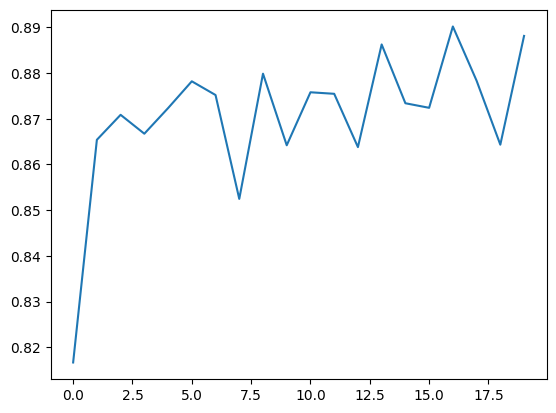

In [25]:
plt.plot(result.history['val_accuracy'])

In [27]:
# 아담으로 바꾼다면 위의 과대적합 현상이 줄어듬
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
result = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target))

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7736 - loss: 0.6796 - val_accuracy: 0.8427 - val_loss: 0.4506
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8544 - loss: 0.4082 - val_accuracy: 0.8569 - val_loss: 0.3915
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8672 - loss: 0.3673 - val_accuracy: 0.8323 - val_loss: 0.4708
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8797 - loss: 0.3359 - val_accuracy: 0.8639 - val_loss: 0.3849
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8816 - loss: 0.3180 - val_accuracy: 0.8691 - val_loss: 0.3533
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8913 - loss: 0.2980 - val_accuracy: 0.8789 - val_loss: 0.3383
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8944 - loss: 0.2829 - val_accuracy: 0.8783 - val_loss: 0.3328
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8992 - loss: 0.2727 

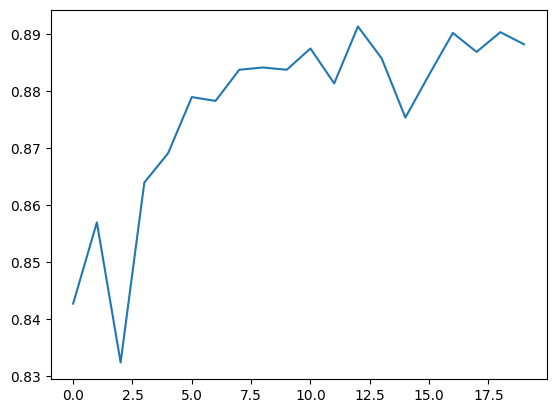

In [28]:
plt.plot(result.history['val_accuracy'])

In [29]:
# 과대 적합을 줄이기 위해ㅏ 드롭아웃을 사용
# 일부 뉴런에 과대하게 의존하는 것을 멈춤
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
result = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target))

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7242 - loss: 0.7890 - val_accuracy: 0.8459 - val_loss: 0.4305
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8375 - loss: 0.4521 - val_accuracy: 0.8581 - val_loss: 0.3911
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8487 - loss: 0.4131 - val_accuracy: 0.8605 - val_loss: 0.3839
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8630 - loss: 0.3781 - val_accuracy: 0.8662 - val_loss: 0.3614
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8657 - loss: 0.3674 - val_accuracy: 0.8729 - val_loss: 0.3444
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8711 - loss: 0.3544 - val_accuracy: 0.8710 - val_loss: 0.3542
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8747 - loss: 0.3436 - val_accuracy: 0.8737 - val_loss: 0.3439
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8803 - loss: 0.3293 - 

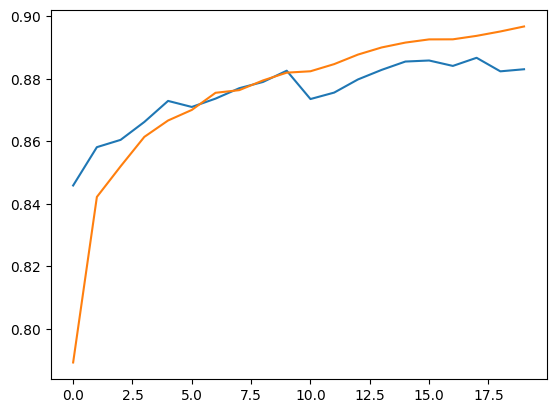

In [32]:
plt.plot(result.history['val_accuracy'])
plt.plot(result.history['accuracy'])

In [33]:
model.save_weights('my_model.weights.h5')

In [34]:
model.save('my_model.keras')

In [35]:
model = model_fn(keras.layers.Dropout(0.3))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

cp = keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only = True)
es = keras.callbacks.EarlyStopping(patience = 2)
result = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), callbacks = [cp, es])

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7222 - loss: 0.7876 - val_accuracy: 0.8459 - val_loss: 0.4269
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8317 - loss: 0.4642 - val_accuracy: 0.8551 - val_loss: 0.3904
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8504 - loss: 0.4088 - val_accuracy: 0.8701 - val_loss: 0.3668
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8595 - loss: 0.3857 - val_accuracy: 0.8673 - val_loss: 0.3616
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8633 - loss: 0.3747 - val_accuracy: 0.8685 - val_loss: 0.3582
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8709 - loss: 0.3573 - val_accuracy: 0.8745 - val_loss: 0.3453
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8713 - loss: 0.3481 - val_accuracy: 0.8741 - val_loss: 0.3437
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8775 - loss: 0.337

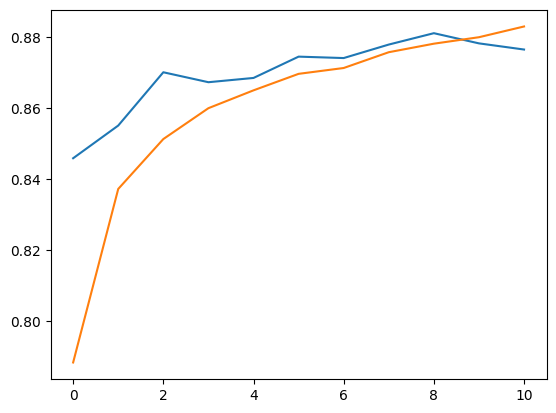

In [36]:
plt.plot(result.history['val_accuracy'])
plt.plot(result.history['accuracy'])